In [1]:
import tensorflow as tf
import os
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPool2D, Dropout,Flatten, Dense 
np.set_printoptions(threshold=np.inf)
from tensorflow.keras import Model

In [2]:
import random

In [3]:
import os,shutil
original_dataset_dir='D:/机器学习+毕设+java资料/吴恩达/cat vs dog/dc/train'
base_dir='D:/机器学习+毕设+java资料/吴恩达/cat vs dog/dc/find_cats_and_dogs'
# os.mkdir(base_dir)

train_dir=os.path.join(base_dir,'train')
os.mkdir(train_dir)
validation_dir=os.path.join(base_dir,'validaiton')
os.mkdir(validation_dir)
test_dir=os.path.join(base_dir,'test')
os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)



In [4]:
ran1=random.sample(range(1,7000),6000)
fnames = ['cat.{}.jpg'.format(i) for i in ran1]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)
ran2=random.sample(range(7000,10000),2000)    
fnames = ['cat.{}.jpg'.format(i) for i in ran2]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
ran3=random.sample(range(10000,12500),2000)        
fnames = ['cat.{}.jpg'.format(i) for i in ran3]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
ran4=random.sample(range(1,7000),6000)   
fnames = ['dog.{}.jpg'.format(i) for i in ran4]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
ran5=random.sample(range(7000,10000),2000)
fnames = ['dog.{}.jpg'.format(i) for i in ran5]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
ran6=random.sample(range(10000,12500),2000)    
fnames = ['dog.{}.jpg'.format(i) for i in ran6]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [6]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 6000
total training dog images: 6000
total validation cat images: 2000
total validation dog images: 2000
total test cat images: 2000
total test dog images: 2000


下面来看一看train文件夹当中的cats文件夹和dogs文件夹当中的文件数据。

In [7]:
train_cat_fnames = os.listdir( train_cats_dir )
train_dog_fnames = os.listdir( train_dogs_dir )

print(train_cat_fnames[:10])
print(train_dog_fnames[:10])


['cat.1.jpg', 'cat.10.jpg', 'cat.1000.jpg', 'cat.1001.jpg', 'cat.1004.jpg', 'cat.1006.jpg', 'cat.1008.jpg', 'cat.1010.jpg', 'cat.1011.jpg', 'cat.1020.jpg']
['dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.1002.jpg', 'dog.1003.jpg', 'dog.1007.jpg', 'dog.1008.jpg', 'dog.101.jpg', 'dog.1015.jpg', 'dog.1016.jpg']


In [8]:
#设置画布大小以及子图个数
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

nrows = 4
ncols = 4

pic_index = 0


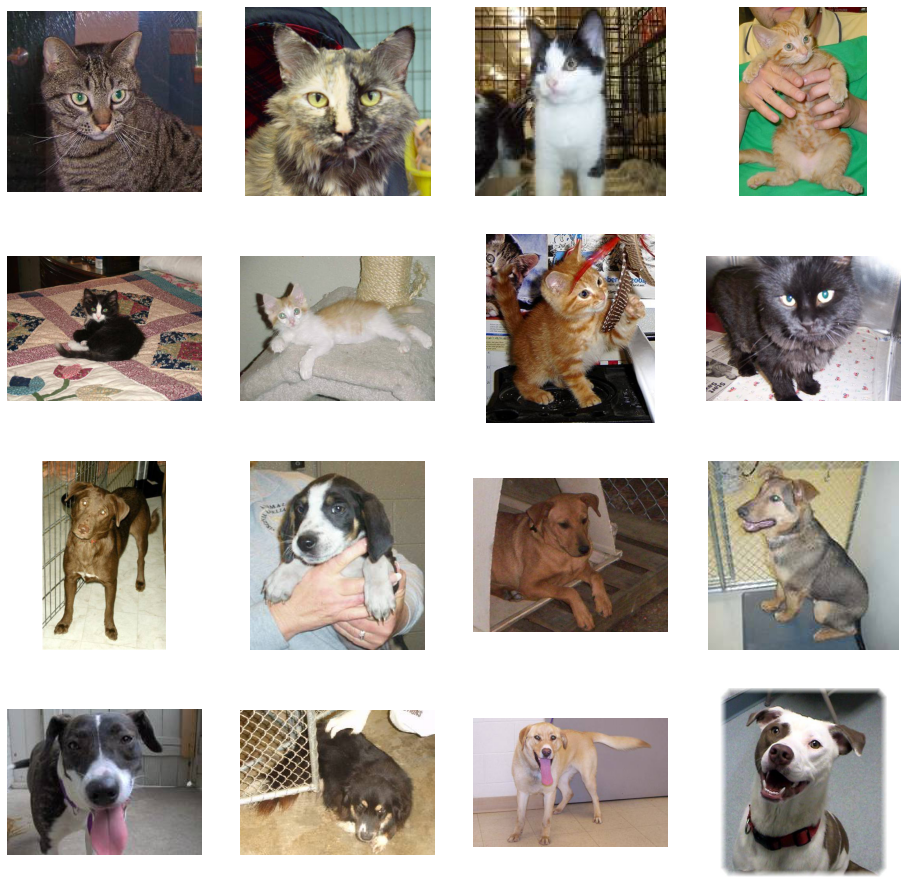

In [9]:
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

next_cat_pix = [os.path.join(train_cats_dir, fname) 
                for fname in train_cat_fnames[ pic_index-8:pic_index] 
               ]

next_dog_pix = [os.path.join(train_dogs_dir, fname) 
                for fname in train_dog_fnames[ pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off')
  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [27]:
from tensorflow.keras import regularizers

In [28]:
model = tf.keras.models.Sequential([
 # 第一层
    tf.keras.layers.Conv2D(48, (11, 11), input_shape=(224, 224, 3), strides=4, padding='valid',activation='relu',
                           kernel_regularizer=regularizers.l2(0.001)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((3, 3), strides=2, padding='valid'),
    # 第二层
    tf.keras.layers.Conv2D(128, (5, 5), padding='same', activation='relu',kernel_regularizer=regularizers.l2(0.001)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((3, 3), strides=2, padding='valid'),
    # 第三层
    tf.keras.layers.Conv2D(192, (3, 3), padding='same',activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    tf.keras.layers.BatchNormalization(),
    # 第四层
    tf.keras.layers.Conv2D(192, (3, 3), padding='same', activation='relu',kernel_regularizer=regularizers.l2(0.001)),
    tf.keras.layers.BatchNormalization(),

    # 第五层
    tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu',kernel_regularizer=regularizers.l2(0.001)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((3, 3), strides=2, padding='valid'),

    tf.keras.layers.Flatten(),
    # 第六层
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    # 第七层
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    # 第八层
    tf.keras.layers.Dense(1, activation='sigmoid')
])


In [29]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])
checkpoint_save_path="./checkpoint/AlexNet.ckpt"
if os.path.exists(checkpoint_save_path+'.index'):
    print("--------加载模型---------")
    model.load_weights(checkpoint_save_path)
cp_callback=tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_save_path,
                                              save_weights_only=True,
                                              save_best_only=True)

In [30]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#标准化到[0,1]
train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

#批量生成20个大小为大小为 224*224 的图像及其标签用于训练
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(224, 224))     
#批量生成20个大小为大小为 224*224 的图像及其标签用于验证
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=20,
                                                         class_mode  = 'binary',
                                                         target_size = (224, 224))


Found 3000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [13]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break


data batch shape: (20, 224, 224, 3)
labels batch shape: (20,)


(224, 224, 3)


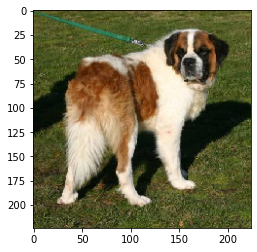

In [31]:
plt.imshow(data_batch[0])
plt.show
print(data_batch[0].shape)

In [32]:
history = model.fit_generator(train_generator,
                              validation_data=validation_generator,
                              steps_per_epoch=100,
                              epochs=30,
                              validation_steps=50,
                              verbose=2)

Epoch 1/30
100/100 - 11s - loss: 2.0725 - acc: 0.5230 - val_loss: 1.3570 - val_acc: 0.5370
Epoch 2/30
100/100 - 10s - loss: 1.3089 - acc: 0.5870 - val_loss: 1.2182 - val_acc: 0.5800
Epoch 3/30
100/100 - 10s - loss: 1.2178 - acc: 0.5850 - val_loss: 1.1974 - val_acc: 0.5320
Epoch 4/30
100/100 - 10s - loss: 1.1491 - acc: 0.5875 - val_loss: 1.1005 - val_acc: 0.5820
Epoch 5/30
100/100 - 10s - loss: 1.0610 - acc: 0.6295 - val_loss: 1.0401 - val_acc: 0.5670
Epoch 6/30
100/100 - 10s - loss: 1.0029 - acc: 0.6290 - val_loss: 0.9520 - val_acc: 0.6470
Epoch 7/30
100/100 - 10s - loss: 0.9274 - acc: 0.6490 - val_loss: 0.9827 - val_acc: 0.5540
Epoch 8/30
100/100 - 10s - loss: 0.8776 - acc: 0.6615 - val_loss: 0.8839 - val_acc: 0.6230
Epoch 9/30
100/100 - 10s - loss: 0.8303 - acc: 0.6830 - val_loss: 0.9167 - val_acc: 0.5290
Epoch 10/30
100/100 - 10s - loss: 0.7948 - acc: 0.6810 - val_loss: 0.9628 - val_acc: 0.5450
Epoch 11/30
100/100 - 10s - loss: 0.7599 - acc: 0.6925 - val_loss: 0.8270 - val_acc: 0.60

In [33]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 54, 54, 48)        17472     
_________________________________________________________________
batch_normalization_3 (Batch (None, 54, 54, 48)        192       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 26, 26, 48)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 26, 26, 128)       153728    
_________________________________________________________________
batch_normalization_4 (Batch (None, 26, 26, 128)       512       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 12, 12, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 12, 12, 192)      

In [ ]:
file=open('./weights-alexnet8.txt','w')
for v in model.trainable_variables:
    file.write(str(v.name) + '\n')
    file.write(str(v.shape) + '\n')
    file.write(str(v.numpy()) + '\n')
file.close()

Text(0.5, 1.0, 'Training and validation loss')

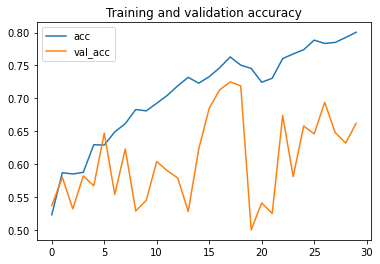

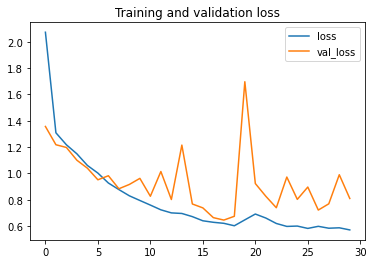

In [34]:
acc      = history.history['acc']
val_acc  = history.history['val_acc']
loss     = history.history['loss']
val_loss = history.history['val_loss']

epochs   = range(len(acc))

plt.plot  ( epochs,     acc ,label='acc')
plt.plot  ( epochs, val_acc ,label='val_acc')
plt.legend(loc='best')
plt.title ('Training and validation accuracy')
plt.figure()
plt.plot  ( epochs,     loss ,label='loss')
plt.plot  ( epochs, val_loss ,label='val_loss')
plt.legend(loc='best')
plt.title ('Training and validation loss')